In [1]:
#import all necessary libs

import pandas as pd
import statsmodels.api as sm
import statsmodels
import matplotlib.pyplot as plt
import numpy as np
from patsy import dmatrices
import scipy


In [2]:
#reading the csv with the data
#data_original will be a pristine version of the dataframe, so i can re-copy it when necessary

data_original = pd.read_csv("./data/datacsv/merged_data.csv")
data_original['poor'] = np.where(data_original['NY_GDP_PCAP_KD']<5000, 1, 0)
data_original.head()


,CountryCode,WHOSIS_000001,NCD_BMI_30A,MH_12,UHC_AVAILABILITY_SCORE,VIOLENCE_HOMICIDERATE,WHS3_49,NUTRITION_ANAEMIA_REPRODUCTIVEAGE_PREV,had_polio,EG_ELC_ACCS_ZS,EN_ATM_PM25_MC_ZS,NY_GDP_PCAP_KD,SH_DYN_MORT,SH_H2O_BASW_ZS,SP_RUR_TOTL_ZS,poor,rich
0,AFG,61.65429,5.2,5.9900,88.88889,9.09402,20.0,39.4,1,71.500000,100.000000,592.476537,70.4,61.339781,75.197,1,0.0
1,ALB,77.84428,21.1,4.2300,79.86111,3.95770,0.0,22.9,0,99.980003,100.000000,3952.802538,9.6,93.394325,42.566,1,0.0
2,DZA,76.54363,26.7,2.7200,85.41667,1.66750,0.0,32.8,0,99.186661,100.000000,4197.421361,25.2,93.409562,29.152,1,0.0
3,AND,NaN,25.4,NaN,31.25000,NaN,0.0,11.0,0,100.000000,90.848063,38885.376014,3.3,99.999998,11.655,0,1.0
4,AGO,61.71907,7.9,13.2696,69.44444,10.05277,0.0,45.0,0,42.000000,100.000000,3100.830685,88.1,54.316928,36.554,1,0.0


In [3]:
#print all graphs
'''
for i in list(data_original)[2:]:
    plt.scatter(x=data_original[i], y=data_original["WHOSIS_000001"])
    plt.title(i)
    plt.show()
    
plt.show()
'''

'\nfor i in list(data_original)[2:]:\n    plt.scatter(x=data_original[i], y=data_original["WHOSIS_000001"])\n    plt.title(i)\n    plt.show()\n    \nplt.show()\n'

In [4]:

#based on the graphs from the past cell, i will use some log in some variables.
#log in MH_12, VIOLENCE_HOMICIDERATE, NY_GDP_PCAP_KD, SH_DYN_MORT


In [5]:
data = data_original.copy()
variables =""
for i in data.columns:
    variables = f" {variables} {i} +"

print(variables)

                  CountryCode + WHOSIS_000001 + NCD_BMI_30A + MH_12 + UHC_AVAILABILITY_SCORE + VIOLENCE_HOMICIDERATE + WHS3_49 + NUTRITION_ANAEMIA_REPRODUCTIVEAGE_PREV + had_polio + EG_ELC_ACCS_ZS + EN_ATM_PM25_MC_ZS + NY_GDP_PCAP_KD + SH_DYN_MORT + SH_H2O_BASW_ZS + SP_RUR_TOTL_ZS + poor + rich +


In [7]:
#First Regression with all variables

Y, X = dmatrices('WHOSIS_000001 ~ NCD_BMI_30A + MH_12 + UHC_AVAILABILITY_SCORE + VIOLENCE_HOMICIDERATE + WHS3_49 + NUTRITION_ANAEMIA_REPRODUCTIVEAGE_PREV + had_polio + EG_ELC_ACCS_ZS + EN_ATM_PM25_MC_ZS + NY_GDP_PCAP_KD + SH_DYN_MORT + SH_H2O_BASW_ZS + SP_RUR_TOTL_ZS + poor + rich + np.log(MH_12) + np.log(VIOLENCE_HOMICIDERATE) + np.log(NY_GDP_PCAP_KD) + np.log(SH_DYN_MORT)', data=data, return_type='dataframe')

model = sm.OLS(Y, X)
res = model.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          WHOSIS_000001   R-squared:                       0.940
Model:                            OLS   Adj. R-squared:                  0.932
Method:                 Least Squares   F-statistic:                     114.6
Date:                Sat, 11 Feb 2023   Prob (F-statistic):           1.18e-74
Time:                        22:51:02   Log-Likelihood:                -327.54
No. Observations:                 158   AIC:                             695.1
Df Residuals:                     138   BIC:                             756.3
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
==========================================================================================================
                                             coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
Intercept                                 78.5052      5.396     14.550      0.000      67.837      89.174
NCD_BMI_30A                               -0.0875      0.029     -2.974      0.003      -0.146      -0.029
MH_12                                     -0.1225      0.027     -4.573      0.000      -0.175      -0.070
UHC_AVAILABILITY_SCORE                     0.0262      0.014      1.919      0.057      -0.001       0.053
VIOLENCE_HOMICIDERATE                     -0.0428      0.027     -1.590      0.114      -0.096       0.010
WHS3_49                                   -0.0049      0.043     -0.112      0.911      -0.091       0.081
NUTRITION_ANAEMIA_REPRODUCTIVEAGE_PREV    -0.0316      0.023     -1.365      0.174      -0.077       0.014
had_polio                                 -0.5965      0.978     -0.610      0.543      -2.531       1.338
EG_ELC_ACCS_ZS                             0.0056      0.017      0.327      0.744      -0.028       0.039
EN_ATM_PM25_MC_ZS                         -0.0007      0.008     -0.094      0.925      -0.016       0.015
NY_GDP_PCAP_KD                          2.573e-05   2.64e-05      0.975      0.331   -2.64e-05    7.79e-05
SH_DYN_MORT                               -0.0360      0.017     -2.175      0.031      -0.069      -0.003
SH_H2O_BASW_ZS                             0.0422      0.028      1.512      0.133      -0.013       0.097
SP_RUR_TOTL_ZS                            -0.0140      0.015     -0.956      0.341      -0.043       0.015
poor                                       0.3504      0.671      0.522      0.603      -0.977       1.678
rich                                      -0.3566      1.011     -0.353      0.725      -2.356       1.642
np.log(MH_12)                             -1.3654      0.448     -3.045      0.003      -2.252      -0.479
np.log(VIOLENCE_HOMICIDERATE)              0.5508      0.372      1.480      0.141      -0.185       1.286
np.log(NY_GDP_PCAP_KD)                     0.6482      0.479      1.353      0.178      -0.299       1.595
np.log(SH_DYN_MORT)                       -3.6990      0.561     -6.598      0.000      -4.808      -2.591
==============================================================================
Omnibus:                        1.381   Durbin-Watson:                   2.186
Prob(Omnibus):                  0.501   Jarque-Bera (JB):                1.466
Skew:                          -0.188   Prob(JB):                        0.480
Kurtosis:                       2.714   Cond. No.                     7.49e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.49e+05. Thi




####----####----####----####----####----####----####----####----####----####----####----####----####----####----####----####



### After multiple iterations,  trying numerous different funtional forms, i arrived at the following model.

#### in the path i used inomerous tests to test to compare between functional forms, such as the F test and RESET.




In [9]:
#Last Regression

Y, X = dmatrices('np.log(WHOSIS_000001) ~ NCD_BMI_30A + MH_12 + UHC_AVAILABILITY_SCORE + SH_DYN_MORT + SH_H2O_BASW_ZS + np.log(NY_GDP_PCAP_KD) + np.log(SH_DYN_MORT)', data=data, return_type='dataframe')

model = sm.OLS(Y, X)
res = model.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     np.log(WHOSIS_000001)   R-squared:                       0.937
Model:                               OLS   Adj. R-squared:                  0.934
Method:                    Least Squares   F-statistic:                     359.7
Date:                   Sat, 11 Feb 2023   Prob (F-statistic):           5.41e-98
Time:                           22:51:27   Log-Likelihood:                 381.72
No. Observations:                    177   AIC:                            -747.4
Df Residuals:                        169   BIC:                            -722.0
Df Model:                              7                                         
Covariance Type:               nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                  4.2275      0.046     92.510      0.000       4.137       4.318
NCD_BMI_30A               -0.0010      0.000     -3.581      0.000      -0.002      -0.000
MH_12                     -0.0030      0.000    -13.907      0.000      -0.003      -0.003
UHC_AVAILABILITY_SCORE     0.0006      0.000      3.592      0.000       0.000       0.001
SH_DYN_MORT               -0.0010      0.000     -5.217      0.000      -0.001      -0.001
SH_H2O_BASW_ZS             0.0008      0.000      2.996      0.003       0.000       0.001
np.log(NY_GDP_PCAP_KD)     0.0142      0.003      4.071      0.000       0.007       0.021
np.log(SH_DYN_MORT)       -0.0392      0.006     -6.797      0.000      -0.051      -0.028
==============================================================================
Omnibus:                        0.622   Durbin-Watson:                   2.072
Prob(Omnibus):                  0.733   Jarque-Bera (JB):                0.749
Skew:                           0.075   Prob(JB):                        0.687
Kurtosis:                       2.719   Cond. No.                     2.52e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.52e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [12]:
#RESET TEST 
# Reset test: checks the functional form of the model.

reset_test = statsmodels.stats.diagnostic.linear_reset(res, power=2, test_type="fitted", use_f=True)
print(reset_test)

# p > 5% = non-Significative, so there is no error in the functional form of the model.

<F test: F=2.7145175145163494, p=0.10130810896903658, df_denom=168, df_num=1>


In [14]:
# BREUSCH-PAGAN TEST (BP)
# bp test: checks for heteroscedasticity in the model.

bp_test = statsmodels.stats.api.het_breuschpagan(res.resid, res.model.exog)
 
statsmodels.compat.lzip(['Lagrange multiplier statistic', 'p-value',
         'f-value', 'f p-value'], bp_test)


# p < 0.05 = reject the null hypothesis, the model has heteroscedasticity, 
# so we need to correct for this, using wls for example.

[('Lagrange multiplier statistic', 27.238476205712846),
 ('p-value', 0.0003018924480271357),
 ('f-value', 4.391078717434394),
 ('f p-value', 0.00016749735647202517)]

JB = 0.7494690367307021 and pvalue-JBcv = 0.6874717656945712 


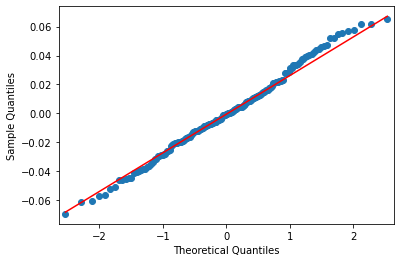

In [15]:
# QQ-PLOT and JARQUE-BERA TEST (jb)
# JB test: checks for the normality of the residuals of the model.


fig = sm.qqplot(data = res.resid, line = 'q', dist = scipy.stats.norm)

jb = statsmodels.stats.api.jarque_bera(res.resid)

print(f"JB = {jb[0]} and pvalue-JBcv = {jb[1]} ")

# p > 0.05 = fails to reject the null hypothesis, this indicates that probabily the residuals does follow a normal distribution.
# the graph show the same result.